## 1. Preparação dos Dados:

In [27]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline



In [37]:
#df_pj = pd.read_csv('PF_tratados.csv')
df_pj = pd.read_csv('../dados/PJ_tratados.csv')


In [29]:
df_pj.drop(columns='Unnamed: 0', inplace=True)

In [38]:
df_pj.head()

,ID Cliente,Linha de Ação,Produto GPOM,Data de Venda,Classe de Serviço,Data de Nascimento,Gênero,Cidade,Microrregião,Estado,Fim de Vigência,Tipo Pessoa,Área de Atuação,Área de Atuação e Produto GPOM,Idade,Tempo de Contrato,Longitude,Latitude
0,56943,EDUCACAO,COLEGIO SESI NOVO ENSINO MEDIO,2022-10-28,ENSINO MEDIO – ITINERARIOS,2008-05-16,MASCULINO,CURITIBA,CURITIBA,PR,2023-12-15,FÍSICA,NÃO INFORMADO,COLEGIO SESI NOVO ENSINO MEDIO / NÃO INFORMADO,14,413,-49.264622,-25.419547
1,19906,EDUCACAO,EDUCACAO INFANTIL,2023-01-13,EDUCACAO INFANTIL - PRE-ESCOLA,1981-08-13,FEMININO,CURITIBA,CURITIBA,PR,2023-12-25,FÍSICA,NÃO INFORMADO,EDUCACAO INFANTIL / NÃO INFORMADO,41,346,-49.264622,-25.419547
2,19906,EDUCACAO,ENSINO FUNDAMENTAL INTERNACIONAL,2021-10-07,ENSINO FUNDAMENTAL - 1º AO 5º ANO,1981-08-13,FEMININO,CURITIBA,CURITIBA,PR,2022-12-14,FÍSICA,NÃO INFORMADO,ENSINO FUNDAMENTAL INTERNACIONAL / NÃO INFORMADO,40,433,-49.264622,-25.419547
3,19906,EDUCACAO,ENSINO FUNDAMENTAL INTERNACIONAL,2023-01-13,ENSINO FUNDAMENTAL - 1º AO 5º ANO,1981-08-13,FEMININO,CURITIBA,CURITIBA,PR,2023-12-25,FÍSICA,NÃO INFORMADO,ENSINO FUNDAMENTAL INTERNACIONAL / NÃO INFORMADO,41,346,-49.264622,-25.419547
4,6940,EDUCACAO,COLEGIO SESI INTERNACIONAL,2021-10-14,ENSINO MEDIO,2006-11-01,FEMININO,CURITIBA,CURITIBA,PR,2022-12-14,FÍSICA,NÃO INFORMADO,COLEGIO SESI INTERNACIONAL / NÃO INFORMADO,14,426,-49.264622,-25.419547


In [31]:
df_pj.columns

Index(['ID Cliente', 'Linha de Ação', 'Produto GPOM', 'Data de Venda',
       'Cidade', 'Classe de Serviço', 'Micro_regiao', 'Porte', 'Estado',
       'Fim de Vigência', 'Tipo Pessoa', 'Setor IBGE', 'Área de Atuação',
       'Área de Atuação e Produto GPOM', 'Tempo de Contrato', 'Longitude',
       'Latitude', 'Código CNAE', 'Descrição CNAE', 'Divisão CNAE'],
      dtype='object')

In [39]:
df_pj['Produto GPOM'].nunique()

33

In [51]:
pd.set_option('display.max_rows', 80)
df_pj['Produto GPOM'].value_counts()

Produto GPOM
TECNICO DE NIVEL MEDIO            38282
APERFEICOAMENTO PROFISSIONAL       9126
GRADUACAO                          8755
QUALIFICACAO PROFISSIONAL          6914
COLEGIO SESI NOVO ENSINO MEDIO     5938
                                  ...  
PROGRAMAS DE SAUDE E SEGURANCA        2
METROLOGIA                            1
EDUCACAO ABERTA                       1
AUXILIO DIAGNOSTICO                   1
LAUDOS                                1
Name: count, Length: 33, dtype: int64

In [44]:
df_pj['TargetA'] = df_pj['Produto GPOM'].apply(lambda x: 1 if x == 'PROGRAMAS DE SAUDE E SEGURANCA' else 0)
df_pj['TargetB'] = df_pj['Produto GPOM'].apply(lambda x: 1 if x == 'AUXILIO DIAGNOSTICO' else 0)
df_pj['TargetC'] = df_pj['Produto GPOM'].apply(lambda x: 1 if x == 'CONSULTA CLINICA OCUPACIONAL' else 0)
df_pj['TargetD'] = df_pj['Produto GPOM'].apply(lambda x: 1 if x == 'APERFEICOAMENTO PROFISSIONAL' else 0)
df_pj['TargetE'] = df_pj['Produto GPOM'].apply(lambda x: 1 if x == 'VACINACAO' else 0)

In [9]:
df_pj.head()

,ID Cliente,Linha de Ação,Produto GPOM,Data de Venda,Cidade,Classe de Serviço,Micro_regiao,Porte,Estado,Fim de Vigência,...,Longitude,Latitude,Código CNAE,Descrição CNAE,Divisão CNAE,TargetA,TargetB,TargetC,TargetD,TargetE
0,550,EDUCACAO,EDUCACAO EXECUTIVA,2021-07-29,CURITIBA,PROGRAMAS NACIONAIS DE EDUCACAO EXECUTIVA,CURITIBA,GRANDE,PR,2021-09-17,...,-49.264622,-25.419547,4911-6/00,TRANSPORTE FERROVIÁRIO DE CARGA,49,0,0,0,0,0
1,550,EDUCACAO,EDUCACAO EXECUTIVA,2022-12-01,CURITIBA,CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...,CURITIBA,GRANDE,PR,2023-12-31,...,-49.264622,-25.419547,4911-6/00,TRANSPORTE FERROVIÁRIO DE CARGA,49,0,0,0,0,0
2,550,EDUCACAO,EDUCACAO EXECUTIVA,2022-12-15,CURITIBA,CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...,CURITIBA,GRANDE,PR,2023-04-30,...,-49.264622,-25.419547,4911-6/00,TRANSPORTE FERROVIÁRIO DE CARGA,49,0,0,0,0,0
3,367,EDUCACAO,EDUCACAO EXECUTIVA,2023-10-16,CURITIBA,CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...,CURITIBA,MÉDIA,PR,2023-12-29,...,-49.264622,-25.419547,8599-6/99,OUTRAS ATIVIDADES DE ENSINO NÃO ESPECIFICADAS ...,85,0,0,0,0,0
4,550,EDUCACAO,GRADUACAO,2022-11-24,CURITIBA,GRADUACAO TECNOLOGICA A DISTANCIA,CURITIBA,GRANDE,PR,2023-03-31,...,-49.264622,-25.419547,4911-6/00,TRANSPORTE FERROVIÁRIO DE CARGA,49,0,0,0,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

colunas_numericas = df_pj.select_dtypes(include=['float64', 'int']).columns

colunas_mais_de_2_valores_unicos = []

for coluna in colunas_numericas:
    if df_pj[coluna].nunique() > 2:
        colunas_mais_de_2_valores_unicos.append(coluna)

scaler = StandardScaler()
df_pj[colunas_mais_de_2_valores_unicos] = scaler.fit_transform(df_pj[colunas_mais_de_2_valores_unicos])


In [11]:
colunas_categoricas = df_pj.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
df_pj[colunas_categoricas] = df_pj[colunas_categoricas].apply(label_encoder.fit_transform)


In [12]:
df_pj

,ID Cliente,Linha de Ação,Produto GPOM,Data de Venda,Cidade,Classe de Serviço,Micro_regiao,Porte,Estado,Fim de Vigência,...,Longitude,Latitude,Código CNAE,Descrição CNAE,Divisão CNAE,TargetA,TargetB,TargetC,TargetD,TargetE
0,3804,2,43,501,75,75,10,1,1,293,...,1.168055,-0.590413,621,837,0.652823,0,0,0,0,0
1,3804,2,43,885,75,25,10,1,1,1108,...,1.168055,-0.590413,621,837,0.652823,0,0,0,0,0
2,3804,2,43,898,75,25,10,1,1,877,...,1.168055,-0.590413,621,837,0.652823,0,0,0,0,0
3,2469,2,43,1119,75,25,10,3,1,1106,...,1.168055,-0.590413,788,692,2.293266,0,0,0,0,0
4,3804,2,50,879,75,57,10,1,1,848,...,1.168055,-0.590413,621,837,0.652823,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79054,5897,3,86,410,132,59,19,4,1,398,...,-0.640685,1.249986,481,129,0.516120,0,0,0,0,1
79055,10583,3,14,399,233,49,34,2,1,472,...,-1.536032,1.060740,350,399,-0.121830,0,1,0,0,0
79056,10583,3,28,399,233,16,34,2,1,472,...,-1.536032,1.060740,350,399,-0.121830,0,0,1,0,0
79057,10583,3,68,399,233,66,34,2,1,472,...,-1.536032,1.060740,350,399,-0.121830,1,0,0,0,0


In [13]:
df_pj.columns

Index(['ID Cliente', 'Linha de Ação', 'Produto GPOM', 'Data de Venda',
       'Cidade', 'Classe de Serviço', 'Micro_regiao', 'Porte', 'Estado',
       'Fim de Vigência', 'Tipo Pessoa', 'Setor IBGE', 'Área de Atuação',
       'Área de Atuação e Produto GPOM', 'Tempo de Contrato', 'Longitude',
       'Latitude', 'Código CNAE', 'Descrição CNAE', 'Divisão CNAE', 'TargetA',
       'TargetB', 'TargetC', 'TargetD', 'TargetE'],
      dtype='object')

## 2. Separação Teste e Treino e Balanceamento das Bases

In [14]:
X = df_pj[['Linha de Ação', 'Cidade', 'Tempo de Contrato', 'Setor IBGE', 'Código CNAE', 'Porte']]
y = df_pj['TargetA']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)


In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Antes do balanceamento
print("Antes:")
print(Counter(y_train))

# Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Over-sampling com SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Após o balanceamento
print("\nDepois do Random Over-sampling:")
print(Counter(y_train_over))

print("\nDepois do Random Under-sampling:")
print(Counter(y_train_under))


Antes:
Counter({0: 44284, 1: 11057})

Depois do Random Over-sampling:
Counter({0: 44284, 1: 44284})

Depois do Random Under-sampling:
Counter({0: 11057, 1: 11057})


## 3. TPot Testes

### a. Base Sem Balanceamento

In [16]:

from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, 
                      population_size=50,  
                      verbosity=2, 
                      scoring='roc_auc', 
                      cv=5)

tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('./pipelines/tpot_digits_pipeline_cv.py')


/home/hub-ia/anaconda3/envs/senai-sprint2/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                               
Generation 1 - Current best internal CV score: 0.773097477090966
                                                                              
Generation 2 - Current best internal CV score: 0.7738708566499458
                                                                              
Generation 3 - Current best internal CV score: 0.7738708566499458
                                                                              
Generation 4 - Current best internal CV score: 0.7738730932221749
                                                                              
Generation 5 - Current best internal CV score: 0.7743015247240581
                                                                              
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, n_jobs=1, subsample=0.7500000000000001, verbosity=0)
0.772278401424854


### b. OverSampling

In [17]:

tpot = TPOTClassifier(generations=5, 
                      population_size=50,  
                      verbosity=2, 
                      scoring='roc_auc',
                      cv=5)

tpot.fit(X_train_over, y_train_over)
print(tpot.score(X_test, y_test))
tpot.export('./pipelines/tpot_digits_pipeline_cv_over.py')


                                                                               
Generation 1 - Current best internal CV score: 0.8073709141223213
                                                                                
Generation 2 - Current best internal CV score: 0.8073709141223213
                                                                                
Generation 3 - Current best internal CV score: 0.8073709141223213
                                                                                  
Generation 4 - Current best internal CV score: 0.8073709141223213
                                                                                
Generation 5 - Current best internal CV score: 0.8073709141223213
                                                                                
Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.2, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
0.6800832861589132


### c. UnderSampling

In [18]:

tpot = TPOTClassifier(generations=5, 
                      population_size=50,  
                      verbosity=2, 
                      scoring='roc_auc',
                      cv=5)

tpot.fit(X_train_under, y_train_under)
print(tpot.score(X_test, y_test))
tpot.export('./pipelines/tpot_digits_pipeline_cv_under.py')


                                                                              
Generation 1 - Current best internal CV score: 0.7692934090125647
                                                                              
Generation 2 - Current best internal CV score: 0.7693191587950091
                                                                              
Generation 3 - Current best internal CV score: 0.7710732510210698
                                                                              
Generation 4 - Current best internal CV score: 0.7710732510210698
                                                                              
Generation 5 - Current best internal CV score: 0.7710732510210698
                                                                              
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=4, max_features=0.35000000000000003, min_samples_leaf=15, min_samples_split=9, n_estimators=100, subsample=0.55

## 4. Treinamento Com os Melhores Classificadores

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Modelos

xgbc = XGBClassifier(learning_rate=0.1, 
                                  max_depth=4, 
                                  min_child_weight=3, 
                                  n_estimators=100, 
                                  n_jobs=1, 
                                  subsample=0.7500000000000001, 
                                  verbosity=0)

# Over Sampling
etc = ExtraTreesClassifier(bootstrap=False, 
                           criterion="entropy", 
                           max_features=0.2, 
                           min_samples_leaf=1, 
                           min_samples_split=6, 
                           n_estimators=100)

# Under Sampling
gbc = GradientBoostingClassifier(learning_rate=0.1, 
                                 max_depth=4, 
                                 max_features=0.35000000000000003, 
                                 min_samples_leaf=15, 
                                 min_samples_split=9, 
                                 n_estimators=100, 
                                 subsample=0.55)


In [17]:
def run_classifier(classifier, X_train, y_train):
    pipeline = Pipeline([('classifier', classifier)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    avaliacao = classification_report(y_test, y_pred)

    return y_pred, cm, avaliacao

In [18]:

y_pred_xgbc, cm_xgbc, avaliacao_xgbc = run_classifier(xgbc, X_train, y_train)
y_pred_etc, cm_etc, avaliacao_etc = run_classifier(etc, X_train_over, y_train_over)
y_pred_gbc, cm_gbc, avaliacao_gbc = run_classifier(gbc, X_train_under, y_train_under)

In [44]:
accuracy = accuracy_score(y_test, y_pred_etc)
accuracy

0.6357618686229868

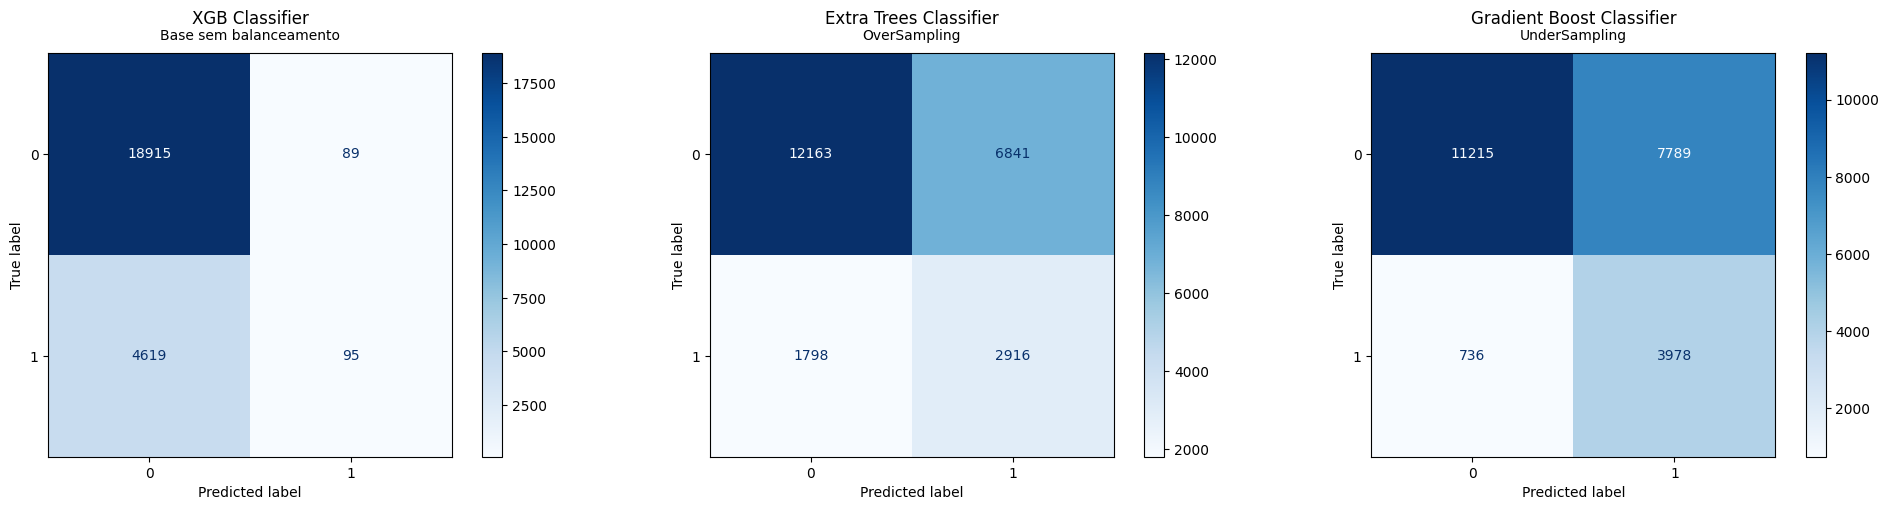

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ConfusionMatrixDisplay(cm_xgbc).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('XGB Classifier\n')
axes[0].text(0.5, 1.06, 'Base sem balanceamento', transform=axes[0].transAxes, ha='center', va='top')

ConfusionMatrixDisplay(cm_etc).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Extra Trees Classifier\n')
axes[1].text(0.5, 1.06, 'OverSampling', transform=axes[1].transAxes, ha='center', va='top')

ConfusionMatrixDisplay(cm_gbc).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('Gradient Boost Classifier\n')
axes[2].text(0.5, 1.06, 'UnderSampling', transform=axes[2].transAxes, ha='center', va='top')

plt.tight_layout()
plt.show()


In [36]:
print(f'------------- XGB Classifier (Sem Balanceamento) -------------')
print(avaliacao_xgbc)

print('------------- Extra Trees Classifier (OverSampling) -------------')
print(avaliacao_etc)

print('------------- Gradient Boost Classifier (UnderSampling) -------------')
print(avaliacao_gbc)


------------- XGB Classifier (Sem Balanceamento) -------------
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     19004
           1       0.52      0.02      0.04      4714

    accuracy                           0.80     23718
   macro avg       0.66      0.51      0.46     23718
weighted avg       0.75      0.80      0.72     23718

------------- Extra Trees Classifier (OverSampling) -------------
              precision    recall  f1-score   support

           0       0.87      0.64      0.74     19004
           1       0.30      0.62      0.40      4714

    accuracy                           0.64     23718
   macro avg       0.59      0.63      0.57     23718
weighted avg       0.76      0.64      0.67     23718

------------- Gradient Boost Classifier (UnderSampling) -------------
              precision    recall  f1-score   support

           0       0.94      0.59      0.72     19004
           1       0.34      0.84     